In [2]:
from directories import *
image_size = (128, 128)
mask_size = (128, 128)

train_images_size = len(train_images)
batch_size = 4
steps_per_epoch = train_images_size // batch_size

validation_images_size = len(validation_images)
validation_batch_size = 1
validation_steps = validation_images_size // validation_batch_size

learning_rate = 6e-4
epochs = 20

In [3]:
from load import MakeDataset, Clahe_Dataset, Clahe_HSV_Dataset
train_dataset = Clahe_Dataset(train_images, train_masks, image_size, mask_size, train_images_size, batch_size)
validation_dataset = Clahe_Dataset(validation_images, validation_masks, image_size, mask_size, validation_images_size, validation_batch_size)

2022-12-13 00:43:27.192809: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-13 00:43:31.104120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-13 00:43:31.154757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-13 00:43:31.155279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-13 00:43:31.156119: I t

In [4]:
#with strategy.scope():
from models import *
from load import load_saved_model

model = batch_normalization_model(image_size)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 3)  12         ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['batch_normalization[0][0]']    
                                )                                                             

In [7]:
from tensorflow.keras.optimizers import Adam
from metrics import jacc_loss, dice_coef, jacc_coef, acc, mean_IoU, sensitivity, specificity, discrete_jacc
model.compile(optimizer = Adam(learning_rate=learning_rate), loss = jacc_loss, metrics = [acc, dice_coef, jacc_coef, mean_IoU, sensitivity, specificity, discrete_jacc])

In [8]:
history = model.fit(
    train_dataset, 
    batch_size=batch_size, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    validation_data=validation_dataset, 
    validation_batch_size=validation_batch_size,
    validation_steps=validation_steps
)

Epoch 1/20


2022-12-13 00:43:55.718083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-12-13 00:43:57.074432: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-13 00:43:57.461859: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-13 00:43:57.461906: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-13 00:43:57.597248: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to al

500/500 [==============================] - 74s 134ms/step - loss: 0.3176 - binary_accuracy: 0.9165 - dice_coef: 0.6661 - jacc_coef: 0.6824 - mean_IoU: 0.7307 - sensitivity: 0.7835 - specificity: 0.9692 - discrete_jacc: 0.6353 - val_loss: 0.4592 - val_binary_accuracy: 0.8888 - val_dice_coef: 0.5706 - val_jacc_coef: 0.5408 - val_mean_IoU: 0.7601 - val_sensitivity: 0.8809 - val_specificity: 0.9073 - val_discrete_jacc: 0.5235
Epoch 2/20
500/500 [==============================] - 67s 135ms/step - loss: 0.2645 - binary_accuracy: 0.9304 - dice_coef: 0.7110 - jacc_coef: 0.7355 - mean_IoU: 0.7690 - sensitivity: 0.8006 - specificity: 0.9807 - discrete_jacc: 0.6853 - val_loss: 0.3891 - val_binary_accuracy: 0.9091 - val_dice_coef: 0.6191 - val_jacc_coef: 0.6109 - val_mean_IoU: 0.7750 - val_sensitivity: 0.8550 - val_specificity: 0.9492 - val_discrete_jacc: 0.5989
Epoch 3/20
500/500 [==============================] - 67s 133ms/step - loss: 0.2467 - binary_accuracy: 0.9350 - dice_coef: 0.7351 - jacc_

In [9]:
from utils import plot_graphs, save_dict_as_json, load_multiple

In [10]:
save_dict_as_json(history.history, "batch_4_2000_6e-4_20")
model.save("batch_4_2000_6e-4_20.h5")

In [11]:
history = load_multiple("batch_4_2000_6e-4_20.json")

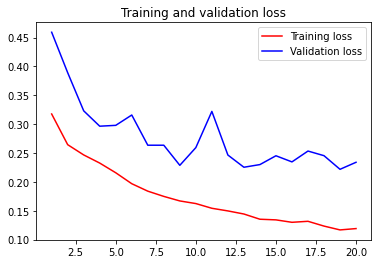

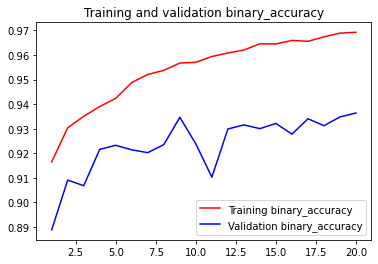

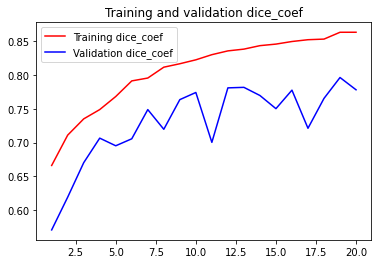

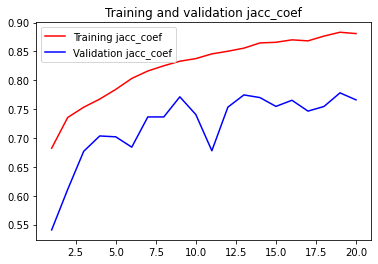

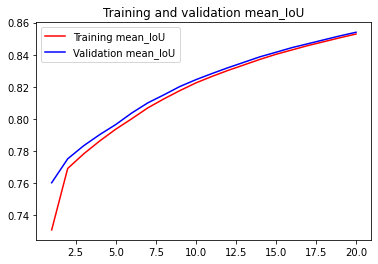

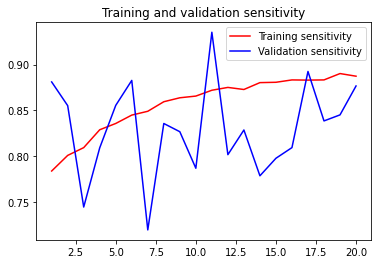

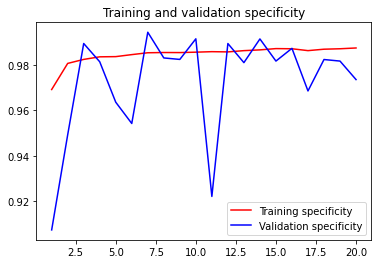

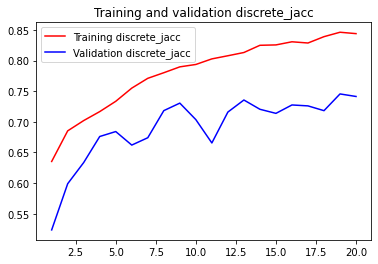

Min/Max Validation val_loss 0.2218339592218399 0.45920222997665405
Min/Max Validation val_binary_accuracy 0.888848066329956 0.9363956451416016
Min/Max Validation val_dice_coef 0.5705799460411072 0.79634028673172
Min/Max Validation val_jacc_coef 0.5407976508140564 0.7781661152839661
Min/Max Validation val_mean_IoU 0.7600942254066467 0.8540106415748596
Min/Max Validation val_sensitivity 0.7191153764724731 0.935272753238678
Min/Max Validation val_specificity 0.9072683453559875 0.9944309592247009
Min/Max Validation val_discrete_jacc 0.5234653949737549 0.745604395866394


In [12]:
plot_graphs(history, smooth=False)

In [13]:
test_dataset = Clahe_Dataset(test_images, test_masks, image_size, mask_size, len(test_images), batch_size)

In [14]:
model.evaluate(test_dataset, steps=len(test_images))

600/600 [==============================] - 61s 99ms/step - loss: 0.2475 - binary_accuracy: 0.9222 - dice_coef: 0.7985 - jacc_coef: 0.7525 - mean_IoU: 0.8523 - sensitivity: 0.8309 - specificity: 0.9690 - discrete_jacc: 0.7056


[0.24746699631214142,
 0.9222472906112671,
 0.7984768152236938,
 0.7525330781936646,
 0.8523093461990356,
 0.8308981657028198,
 0.9689822196960449,
 0.7055538296699524]

1/1 [==============================] - 0s 220ms/step
1.0


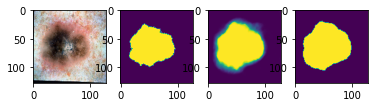

1/1 [==============================] - 0s 25ms/step
1.0


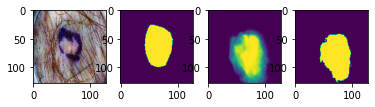

1/1 [==============================] - 0s 24ms/step
1.0


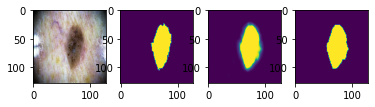

1/1 [==============================] - 0s 24ms/step
1.0


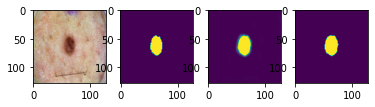

1/1 [==============================] - 0s 26ms/step
1.0


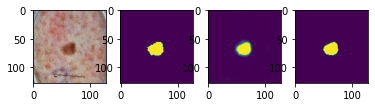

In [15]:
import matplotlib.pyplot as plt
test_dataset = Clahe_Dataset(test_images, test_masks, image_size, mask_size,  len(test_images), batch_size=1)
for image, mask in test_dataset.take(5).as_numpy_iterator():
  prediction = model.predict(image)
  f, ax = plt.subplots(1,4)
  ax[0].imshow(image[0])
  ax[1].imshow(mask[0].squeeze(axis=2))
  ax[2].imshow(prediction[0].squeeze(axis=2))
  ax[3].imshow(prediction[0].squeeze(axis=2).round())
  print(max(prediction[0].squeeze(axis=2).flatten()))
  plt.show()